# Problema das N-Rainhas com Simulated Annealing

Importações de bibliotecas

In [1]:
import math
import random
import time
import numpy as np
from matplotlib import patches, pyplot as plt

Algoritmo do Hill-Climbing

In [2]:
historico_de_ataques = []

def gera_estado_inicial(n):
    board = [random.randint(0, n-1) for _ in range(n)]
    return board

def calcula_ataques(n, board):
    h = 0
    for i in range(n):
        for j in range(i+1, n):

            if board[i] == board[j]:   # checagem de rainhas na mesma linha
                h += 1

            offset = j - i

            # checagem das diagonais
            if (board[j] == board[i]-offset) or (board[j] == board[i] + offset):
                h+=1

    return h

def move(n, board, h, temperature):
    boardTemperature = list(board)
    found = False
  
    while not found:
        boardTemperature = list(board)

        # seleciona um movimento aleatório
        new_row = random.randint(0,n-1)
        new_col = random.randint(0,n-1)
        boardTemperature[new_col] = new_row
        new_h = calcula_ataques(n, boardTemperature)

        # se o movimento for otimo, aceita
        if new_h < h:
            found = True
        else:
            # senão, calcula o risco
            # se for arriscado rejeita(continua o laço), senão aceita
            delta_e = h - new_h
            accept_prob = min(1,math.exp(delta_e/temperature))
            found = random.random() <= accept_prob
    
    return boardTemperature


def simulatedAnnealing(n):
    global historico_de_ataques
    
    inicio = time.time()
    
    board = gera_estado_inicial(n)
    h = calcula_ataques(n, board)
    historico_de_ataques.append(h)
    
    temperature = n**2
    cooling_rate = 0.95
    steps = 0
    
    while h > 0:
        board = move(n, board,h, temperature)
        h = calcula_ataques(n, board)
        historico_de_ataques.append(h)
        
        # diminui aceitavelmente a temperatura
        n_temp = max(temperature * cooling_rate,0.01)
        temperature = n_temp

        steps += 1
        if steps >= 2000:
            break

    fim = time.time()
    return steps, board, (fim - inicio)

Funções para mostrar a solução e o mapa do número de ataques

In [3]:
def plot_attacks(historico_de_ataques, N):
    plt.figure(figsize=(12, 6))
    plt.plot(historico_de_ataques)
    plt.xlabel('Iterações totais dos melhores vizinhos')
    plt.ylabel('Número de Ataques dos melhores vizinhos')
    plt.title(f'Variação do Número de Ataques durante as Execuções com N = {N}')
    plt.grid(True)
    plt.show()
    
def plot_solution(solution, N):
    fig = plt.figure()
    #fig.set_size_inches(20, 20)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, N))
    ax.set_ylim((0, N))

    # Adicionar quadriculado
    for i in range(N):
        for j in range(N):
            color = 'white' if (i + j) % 2 == 0 else 'black'
            ax.add_patch(patches.Rectangle((j, i), 1, 1, color=color))
    
    count = 0
    for queen in solution:
        ax.add_patch(patches.Circle((queen + 0.5, count + 0.5), radius=0.4, fill=True, color='red'))
        count += 1
    plt.show()

# Main

In [8]:
if __name__ == "__main__":
    historico_de_ataques = []
    total_ataques = []

    queens = 32
    rodadas = 5

    for ex in range(rodadas):
        print(f'======== RODADA {ex+1} ========')

        steps, board, tempo = simulatedAnnealing(queens)
            
        h = calcula_ataques(queens, board)
        total_ataques.append(h)
            
        minutos = int(tempo/60)
        segundos = float(tempo%60)
            
        print(f"Conflitos: {h}")
        print(f'Tempo -> {minutos} m {segundos} s')
        print(f"número de passos: {steps}")

        if h != 0:
            print("Limite de movimentos atingido")
        else:
            print("Estado objetivo alcançado")
        
        print(f'============================\n')
        
    qualidade_solucoes = sum(total_ataques) / rodadas
    print('QUALIDADE DAS SOLUCOES ', qualidade_solucoes)

======== RODADA 1 ========
Tabuleiro: [0, 6, 3, 5, 7, 1, 4, 2]
Conflitos: 0
Tempo -> 0 m 0.04399704933166504 s
número de passos: 430
Estado objetivo alcançado

======== RODADA 2 ========
Tabuleiro: [5, 2, 6, 3, 0, 7, 1, 4]
Conflitos: 0
Tempo -> 0 m 0.008005619049072266 s
número de passos: 225
Estado objetivo alcançado

======== RODADA 3 ========
Tabuleiro: [2, 6, 1, 7, 4, 0, 3, 5]
Conflitos: 0
Tempo -> 0 m 0.007992267608642578 s
número de passos: 214
Estado objetivo alcançado

======== RODADA 4 ========
Tabuleiro: [4, 2, 0, 5, 7, 1, 3, 6]
Conflitos: 0
Tempo -> 0 m 0.008025884628295898 s
número de passos: 158
Estado objetivo alcançado

======== RODADA 5 ========
Tabuleiro: [4, 1, 3, 6, 2, 7, 5, 0]
Conflitos: 0
Tempo -> 0 m 0.00398564338684082 s
número de passos: 89
Estado objetivo alcançado

QUALIDADE DAS SOLUCOES  0.0


Mostra graficamente os resultados

In [5]:
# Plot da solução encontrada no tabuleiro
# plot_solution(solution=board, N=queens)

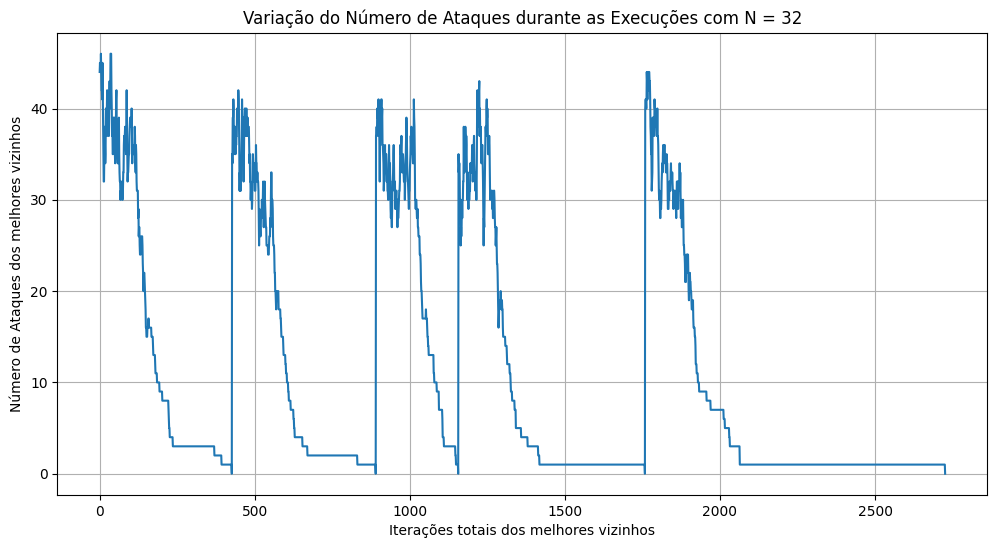

In [7]:
# Plot da variação dos ataques durante a execução

atk = np.sort(historico_de_ataques)[::-1]
plot_attacks(historico_de_ataques, queens)